**REQUIRED LIBRARIES**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix 
import warnings
from yellowbrick.classifier.rocauc import roc_auc
warnings.filterwarnings("ignore")

In [8]:
# from google.colab import files
# upload=files.upload()

In [9]:
file=r"C:\Users\pcd\Desktop\Masters work for 3 guys\Mr Joshua's work\dataset\REMS_Mars_Dataset.csv"
import chardet
with open(file,'rb') as rawdata:
  result=chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

DATA IMPORTATION

In [10]:
df=pd.read_csv(file,encoding='ISO-8859-1')

DATA EXPLORATION

In [11]:
df.head()

,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),wind_speed(m/h),humidity(%),sunrise,sunset,UV_Radiation,weather
0,"Earth, 2022-01-26 UTC","Mars, Month 6 - LS 163°",Sol 3368,-3,-71,10,-84,707,Value not available,Value not available,5:25,17:20,moderate,Sunny
1,"Earth, 2022-01-25 UTC","Mars, Month 6 - LS 163°",Sol 3367,-3,-72,10,-87,707,Value not available,Value not available,5:25,17:20,moderate,Sunny
2,"Earth, 2022-01-24 UTC","Mars, Month 6 - LS 162°",Sol 3366,-4,-70,8,-81,708,Value not available,Value not available,5:25,17:21,moderate,Sunny
3,"Earth, 2022-01-23 UTC","Mars, Month 6 - LS 162°",Sol 3365,-6,-70,9,-91,707,Value not available,Value not available,5:26,17:21,moderate,Sunny
4,"Earth, 2022-01-22 UTC","Mars, Month 6 - LS 161°",Sol 3364,-7,-71,8,-92,708,Value not available,Value not available,5:26,17:21,moderate,Sunny


In [12]:
df.shape

(3197, 14)

In [13]:
df.columns

Index(['earth_date_time', 'mars_date_time', 'sol_number',
       'max_ground_temp(°C)', 'min_ground_temp(°C)', 'max_air_temp(°C)',
       'min_air_temp(°C)', 'mean_pressure(Pa)', 'wind_speed(m/h)',
       'humidity(%)', 'sunrise', 'sunset', 'UV_Radiation', 'weather'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   earth_date_time      3197 non-null   object
 1   mars_date_time       3197 non-null   object
 2   sol_number           3197 non-null   object
 3   max_ground_temp(°C)  3197 non-null   object
 4   min_ground_temp(°C)  3197 non-null   object
 5   max_air_temp(°C)     3197 non-null   object
 6   min_air_temp(°C)     3197 non-null   object
 7   mean_pressure(Pa)    3197 non-null   object
 8   wind_speed(m/h)      3197 non-null   object
 9   humidity(%)          3197 non-null   object
 10  sunrise              3197 non-null   object
 11  sunset               3197 non-null   object
 12  UV_Radiation         3170 non-null   object
 13  weather              3197 non-null   object
dtypes: object(14)
memory usage: 349.8+ KB


In [15]:
df=df.replace('Value not available',np.nan)
df = df.astype({'max_ground_temp(°C)':'float','min_ground_temp(°C)':'float','max_air_temp(°C)':'float','min_air_temp(°C)':'float','mean_pressure(Pa)':'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   earth_date_time      3197 non-null   object 
 1   mars_date_time       3197 non-null   object 
 2   sol_number           3197 non-null   object 
 3   max_ground_temp(°C)  3169 non-null   float64
 4   min_ground_temp(°C)  3169 non-null   float64
 5   max_air_temp(°C)     3168 non-null   float64
 6   min_air_temp(°C)     3168 non-null   float64
 7   mean_pressure(Pa)    3170 non-null   float64
 8   wind_speed(m/h)      0 non-null      float64
 9   humidity(%)          0 non-null      float64
 10  sunrise              3197 non-null   object 
 11  sunset               3197 non-null   object 
 12  UV_Radiation         3170 non-null   object 
 13  weather              3194 non-null   object 
dtypes: float64(7), object(7)
memory usage: 349.8+ KB


In [16]:
df.isnull().sum()

earth_date_time           0
mars_date_time            0
sol_number                0
max_ground_temp(°C)      28
min_ground_temp(°C)      28
max_air_temp(°C)         29
min_air_temp(°C)         29
mean_pressure(Pa)        27
wind_speed(m/h)        3197
humidity(%)            3197
sunrise                   0
sunset                    0
UV_Radiation             27
weather                   3
dtype: int64

<AxesSubplot:xlabel='sol_number', ylabel='max_ground_temp(°C)'>

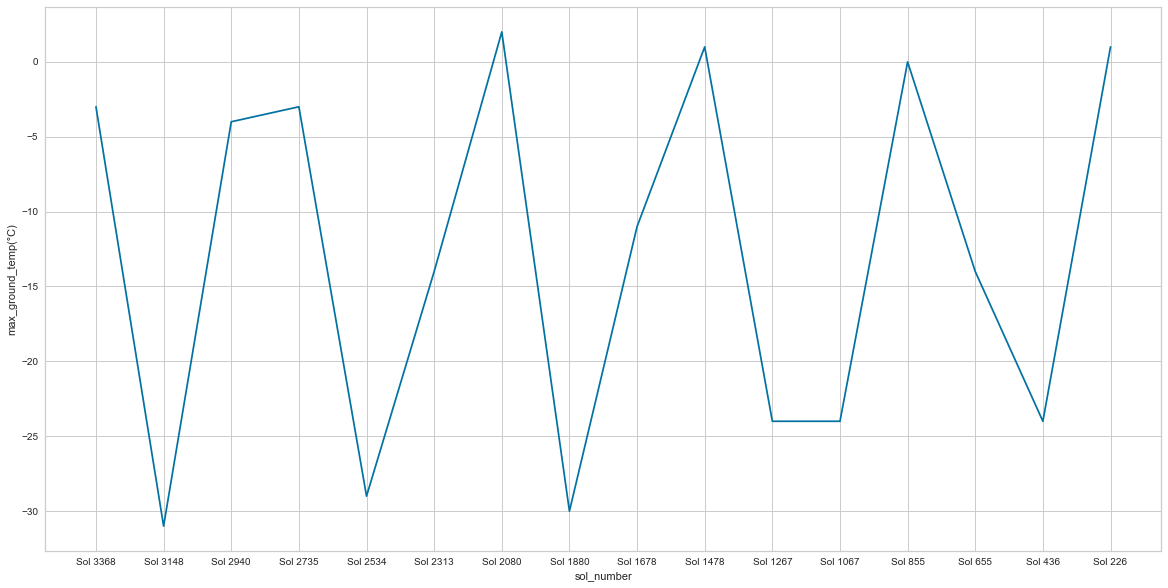

In [17]:
plt.figure(figsize=(20,10))
df2=df.iloc[::200,:]
sns.lineplot(data=df2,x='sol_number',y='max_ground_temp(°C)')

<AxesSubplot:xlabel='sol_number', ylabel='min_ground_temp(°C)'>

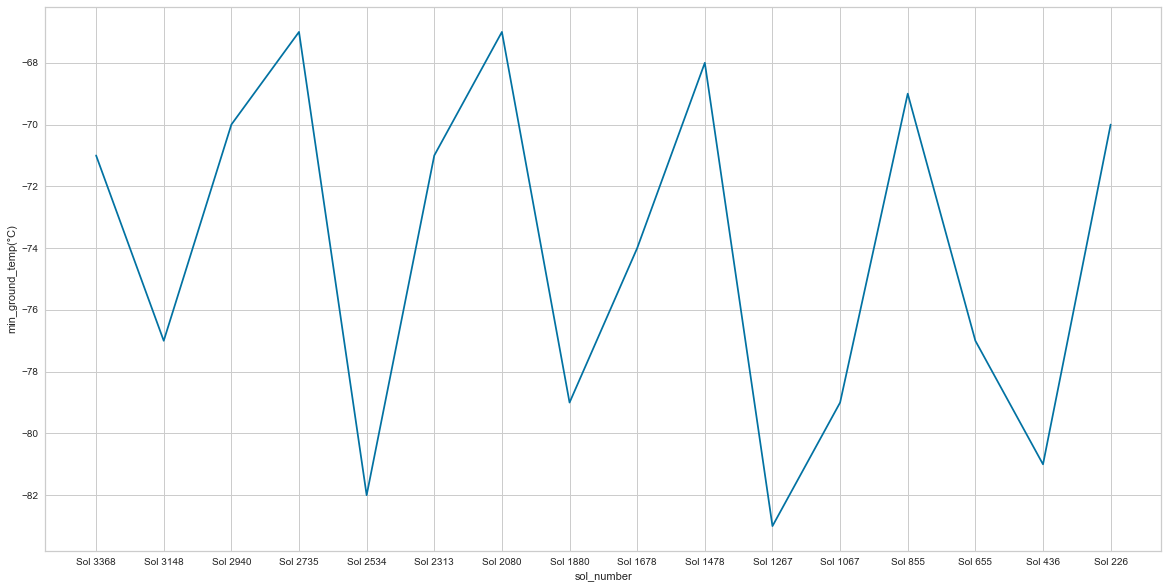

In [18]:
plt.figure(figsize=(20,10))
df2=df.iloc[::200,:]
sns.lineplot(data=df2,x='sol_number',y='min_ground_temp(°C)')

<AxesSubplot:xlabel='sol_number', ylabel='max_air_temp(°C)'>

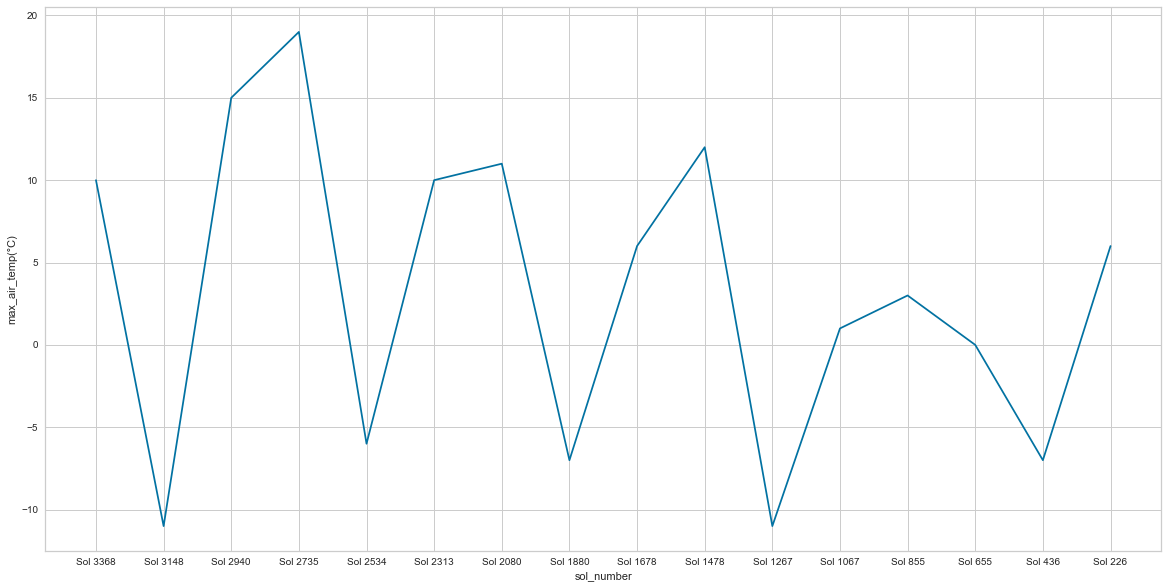

In [19]:
plt.figure(figsize=(20,10))
df2=df.iloc[::200,:]
sns.lineplot(data=df2,x='sol_number',y='max_air_temp(°C)')

<AxesSubplot:xlabel='sol_number', ylabel='UV_Radiation'>

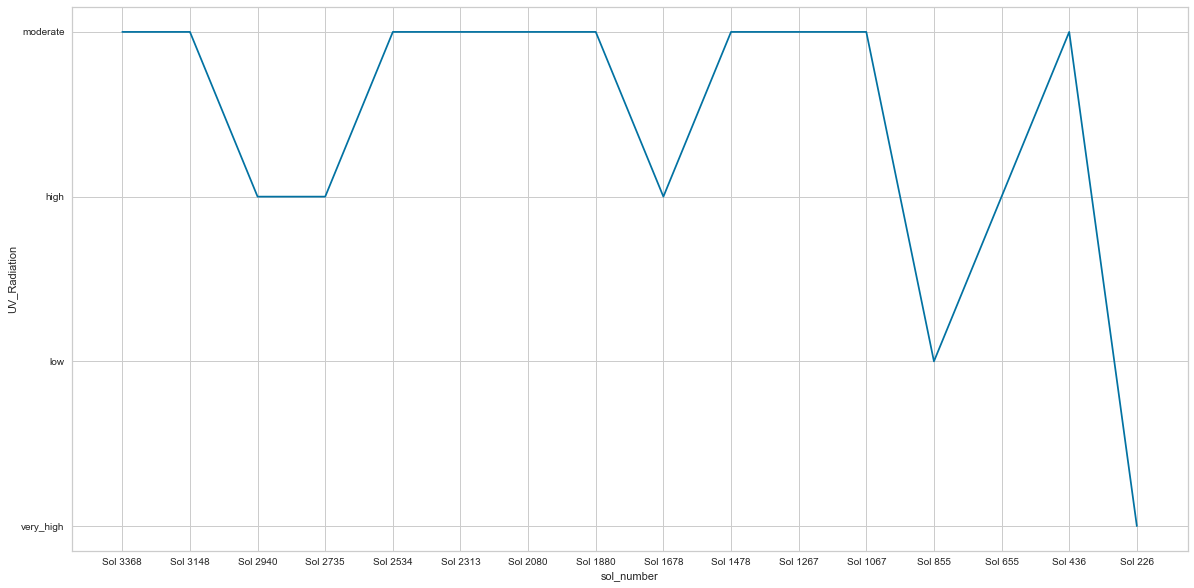

In [20]:
plt.figure(figsize=(20,10))
df2=df.iloc[::200,:]
sns.lineplot(data=df2,x='sol_number',y='UV_Radiation')

<AxesSubplot:xlabel='sol_number', ylabel='mean_pressure(Pa)'>

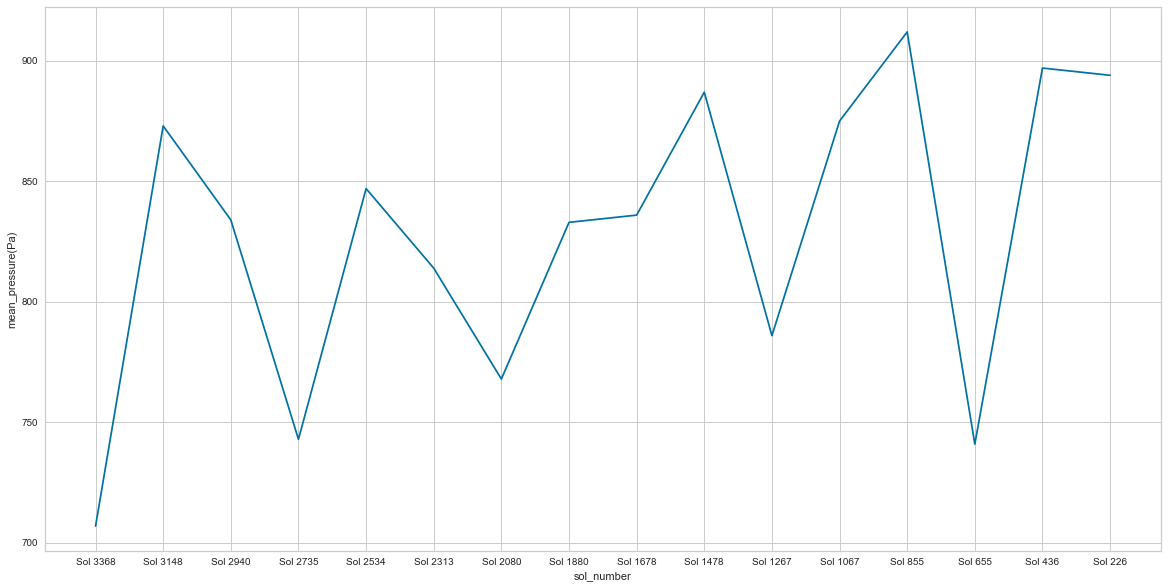

In [21]:
plt.figure(figsize=(20,10))
df2=df.iloc[::200,:]
sns.lineplot(data=df2,x='sol_number',y='mean_pressure(Pa)')

<AxesSubplot:xlabel='sol_number', ylabel='min_air_temp(°C)'>

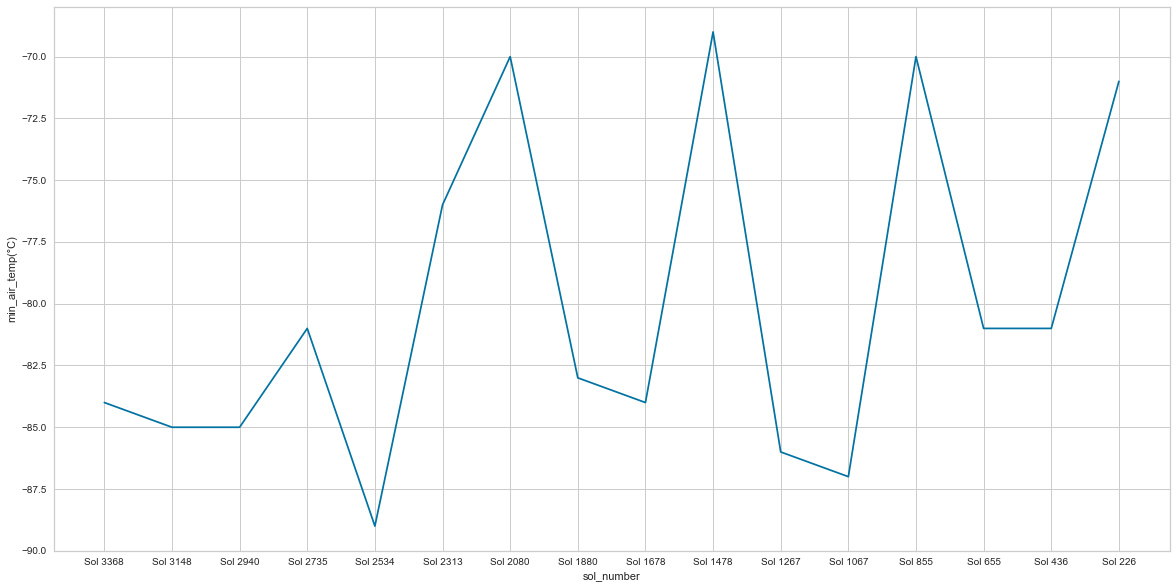

In [22]:
plt.figure(figsize=(20,10))
df2=df.iloc[::200,:]
sns.lineplot(data=df2,x='sol_number',y='min_air_temp(°C)')

DATA CLEANING AND MAKING DATA READY FOR MODEL DEVELOPMENT

In [23]:
df.drop(['wind_speed(m/h)','humidity(%)','earth_date_time','mars_date_time','sol_number','sunrise','sunset','weather'],inplace=True,axis=1)

In [24]:
df.shape

(3197, 6)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   max_ground_temp(°C)  3169 non-null   float64
 1   min_ground_temp(°C)  3169 non-null   float64
 2   max_air_temp(°C)     3168 non-null   float64
 3   min_air_temp(°C)     3168 non-null   float64
 4   mean_pressure(Pa)    3170 non-null   float64
 5   UV_Radiation         3170 non-null   object 
dtypes: float64(5), object(1)
memory usage: 150.0+ KB


In [26]:
df.isnull().sum()

max_ground_temp(°C)    28
min_ground_temp(°C)    28
max_air_temp(°C)       29
min_air_temp(°C)       29
mean_pressure(Pa)      27
UV_Radiation           27
dtype: int64

In [27]:
df.fillna(0.0)

,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),UV_Radiation
0,-3.0,-71.0,10.0,-84.0,707.0,moderate
1,-3.0,-72.0,10.0,-87.0,707.0,moderate
2,-4.0,-70.0,8.0,-81.0,708.0,moderate
3,-6.0,-70.0,9.0,-91.0,707.0,moderate
4,-7.0,-71.0,8.0,-92.0,708.0,moderate
...,...,...,...,...,...,...
3192,-18.0,-76.0,8.0,-82.0,741.0,very_high
3193,-11.0,-76.0,9.0,-83.0,740.0,very_high
3194,-16.0,-75.0,8.0,-83.0,739.0,very_high
3195,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df=df.dropna()
df.isnull().sum()

max_ground_temp(°C)    0
min_ground_temp(°C)    0
max_air_temp(°C)       0
min_air_temp(°C)       0
mean_pressure(Pa)      0
UV_Radiation           0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3194
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   max_ground_temp(°C)  3168 non-null   float64
 1   min_ground_temp(°C)  3168 non-null   float64
 2   max_air_temp(°C)     3168 non-null   float64
 3   min_air_temp(°C)     3168 non-null   float64
 4   mean_pressure(Pa)    3168 non-null   float64
 5   UV_Radiation         3168 non-null   object 
dtypes: float64(5), object(1)
memory usage: 173.2+ KB


<AxesSubplot:xlabel='UV_Radiation', ylabel='max_ground_temp(°C)'>

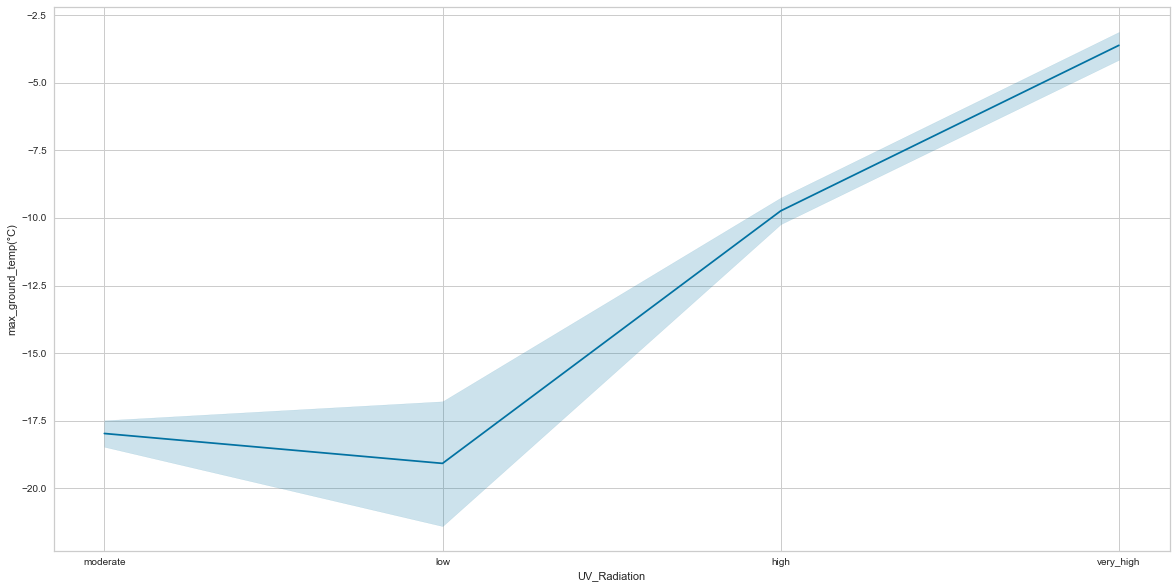

In [30]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='UV_Radiation',y='max_ground_temp(°C)')

<AxesSubplot:xlabel='UV_Radiation', ylabel='min_ground_temp(°C)'>

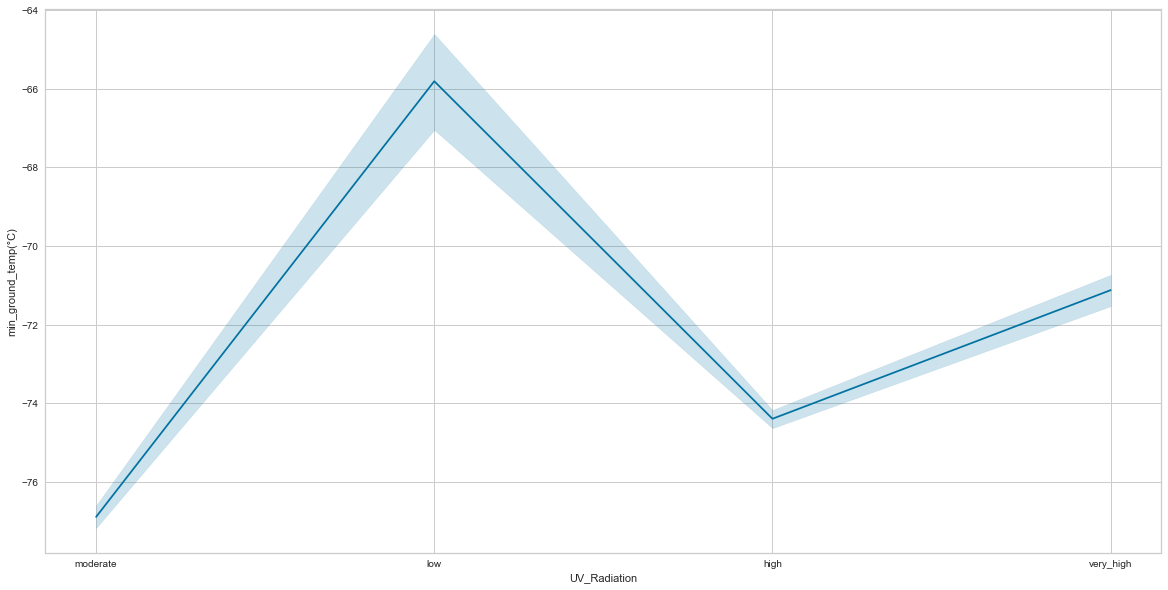

In [31]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='UV_Radiation',y='min_ground_temp(°C)')

<AxesSubplot:xlabel='UV_Radiation', ylabel='max_air_temp(°C)'>

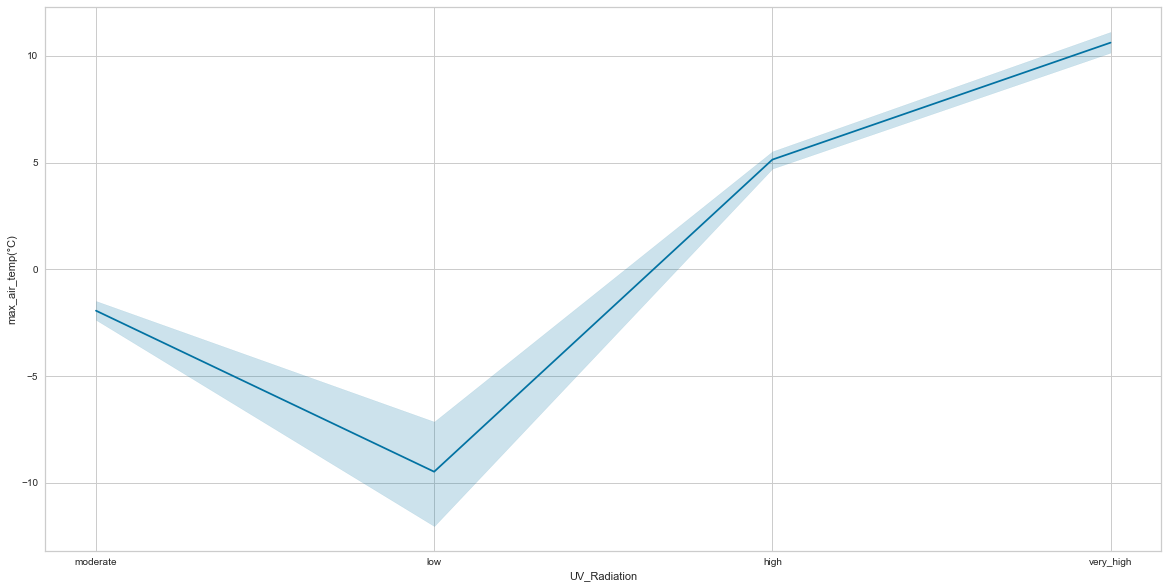

In [32]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='UV_Radiation',y='max_air_temp(°C)')

<AxesSubplot:xlabel='UV_Radiation', ylabel='min_air_temp(°C)'>

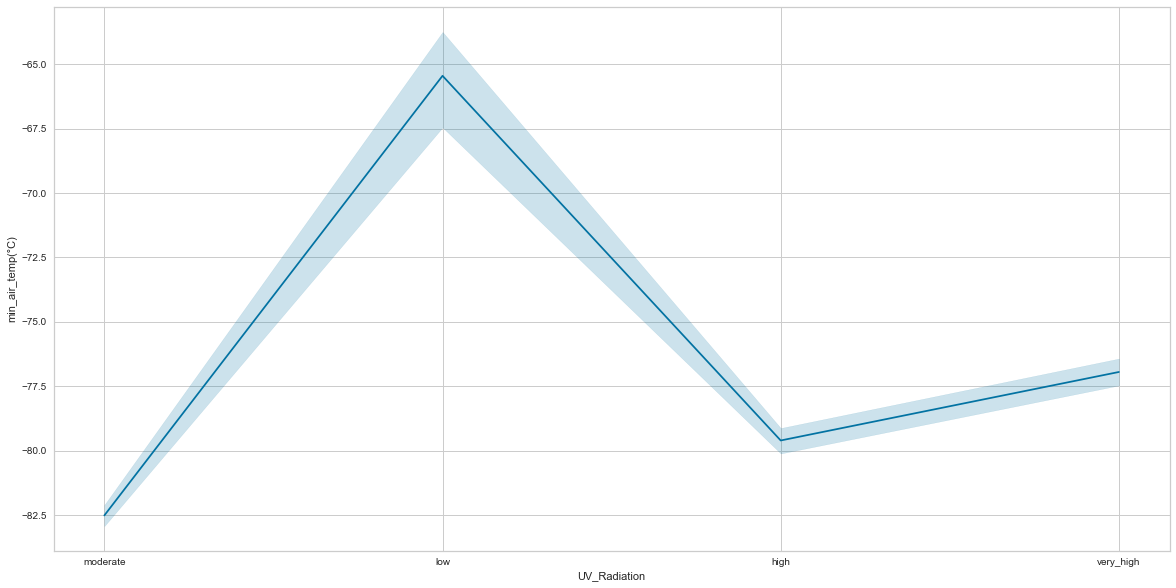

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='UV_Radiation',y='min_air_temp(°C)')

<AxesSubplot:xlabel='UV_Radiation', ylabel='mean_pressure(Pa)'>

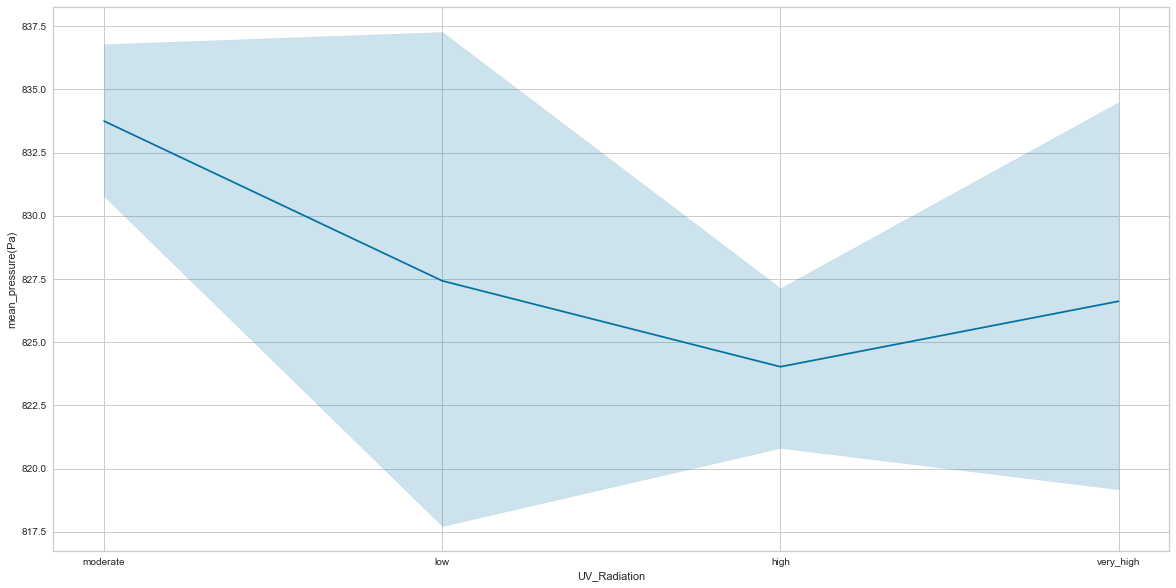

In [34]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='UV_Radiation',y='mean_pressure(Pa)')

<AxesSubplot:>

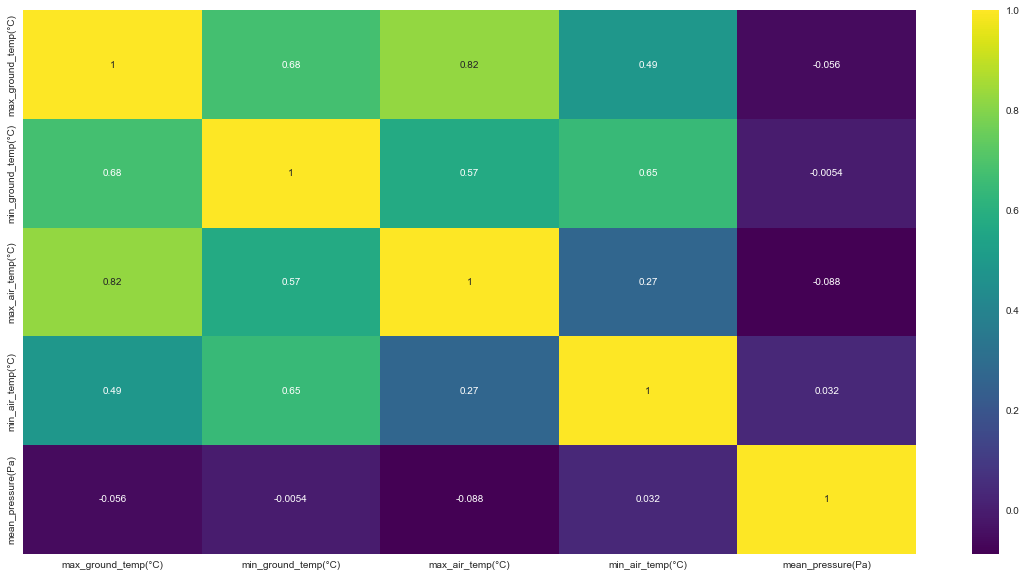

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [36]:
df['UV_Radiation'].value_counts()

moderate     1449
high         1351
very_high     284
low            84
Name: UV_Radiation, dtype: int64

In [37]:
labels=pd.Categorical(df['UV_Radiation'])
labels

['moderate', 'moderate', 'moderate', 'moderate', 'moderate', ..., 'very_high', 'very_high', 'very_high', 'very_high', 'very_high']
Length: 3168
Categories (4, object): ['high', 'low', 'moderate', 'very_high']

<AxesSubplot:>

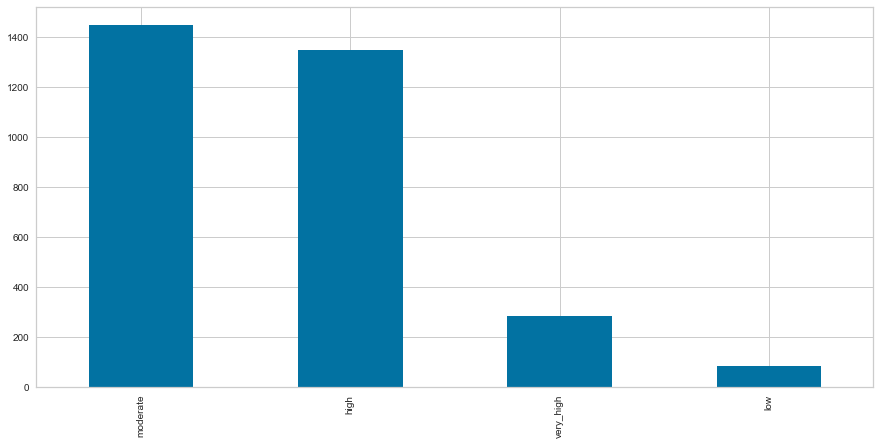

In [38]:
plt.figure(figsize=(15,7))
df['UV_Radiation'].value_counts().plot.bar()

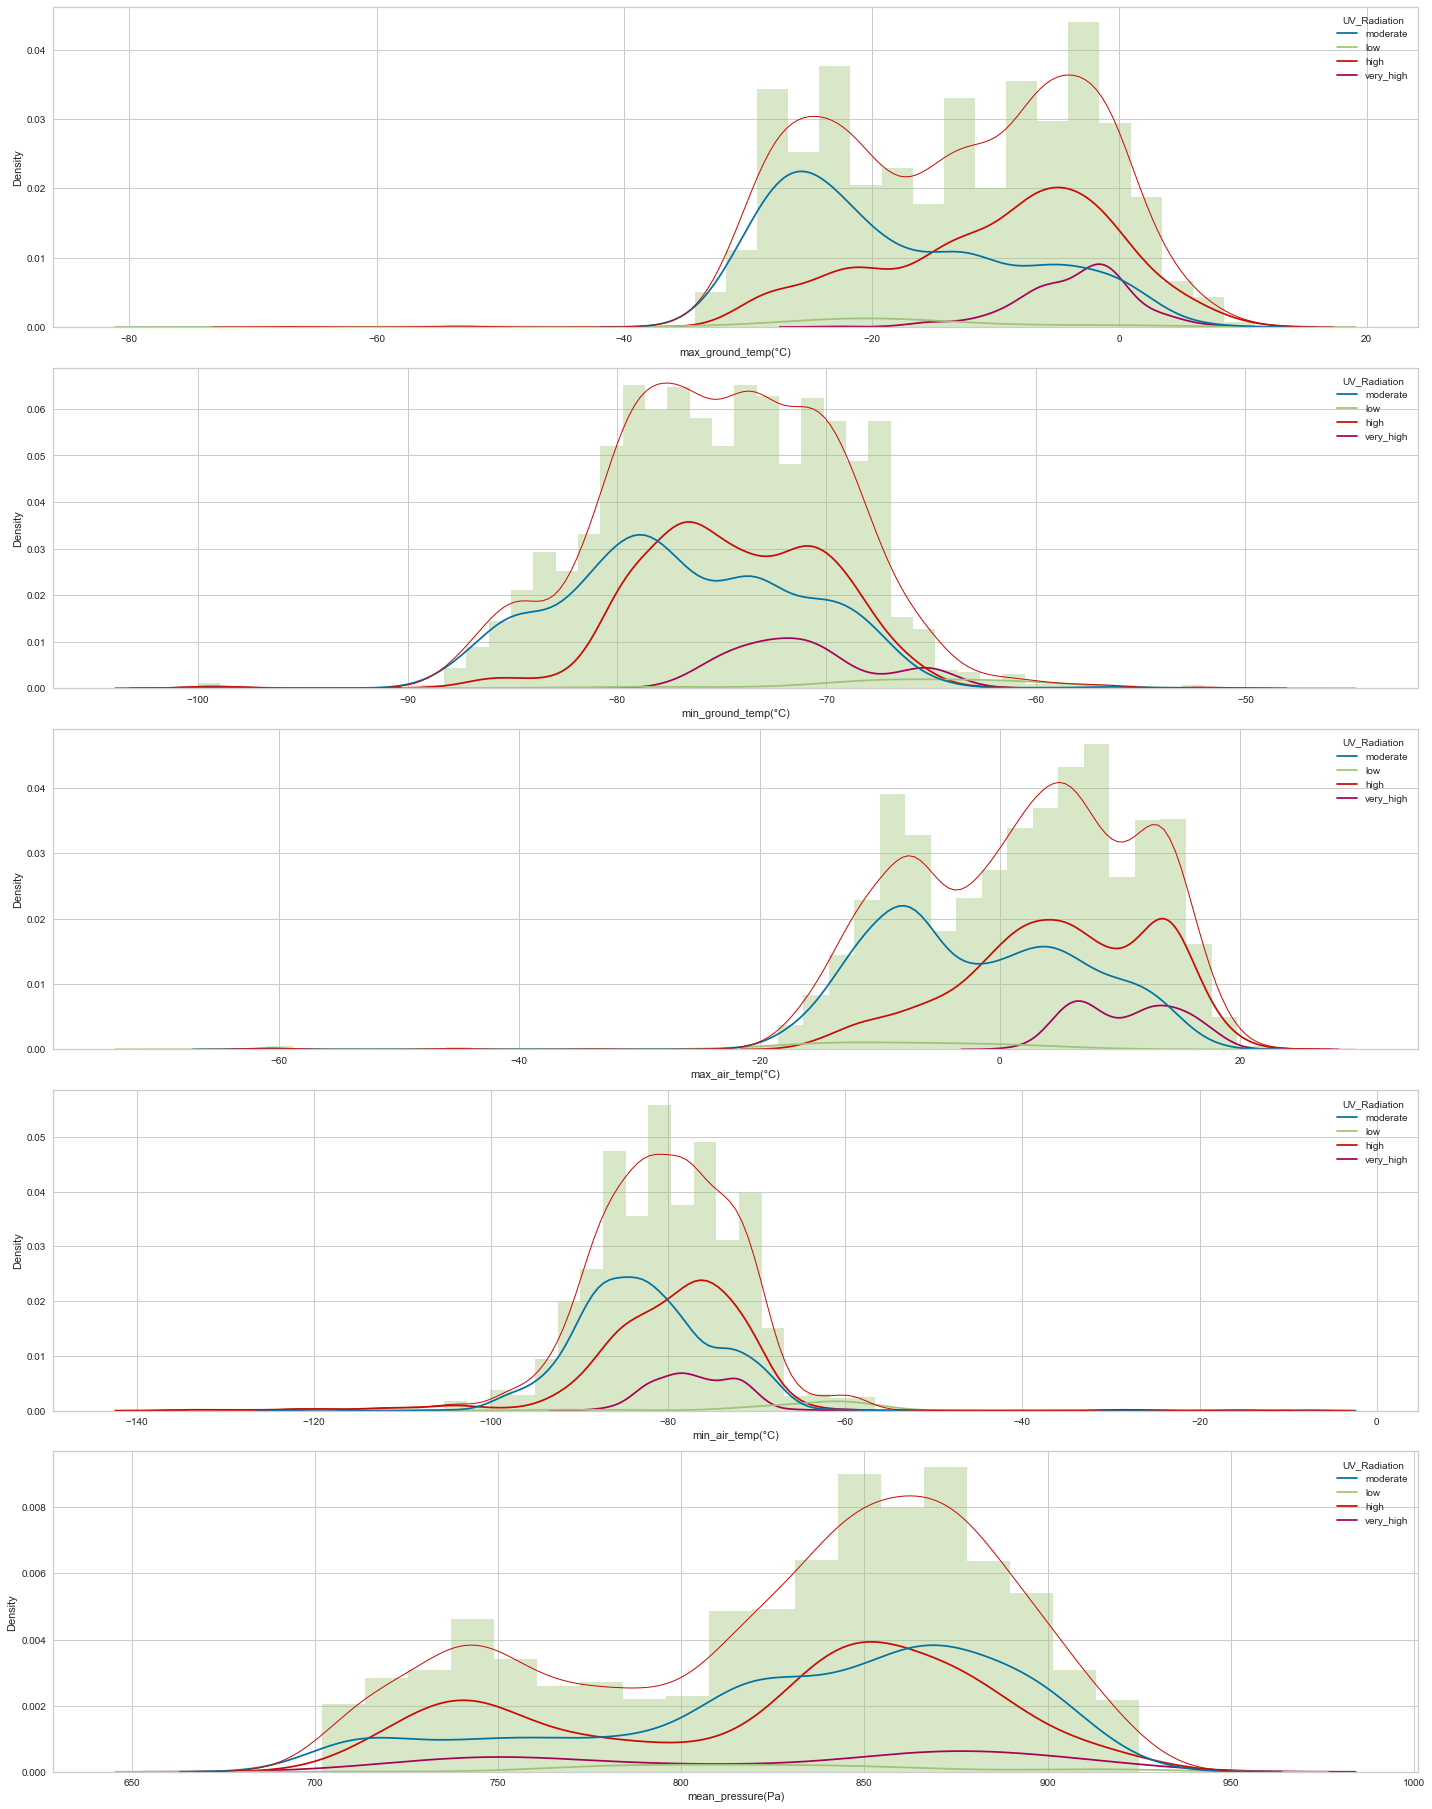

In [39]:
plt.figure(figsize=(20,80))
cols=df.columns
cols=cols[:-1]
for i in range(len(cols)):
  plt.subplot(16,1,i+1)
  sns.kdeplot(data=df,x=cols[i],hue='UV_Radiation')
  sns.distplot(df[cols[i]],kde_kws={'color':'r','lw':1,'label':'KDE'},hist_kws={'color':'g'})

plt.tight_layout()

DATE PROCESSING AND SPLITTING

In [40]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [41]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)

In [42]:
lb=LabelEncoder()
lb.fit(y)

LabelEncoder()

In [43]:
y=lb.transform(y)
classes=lb.classes_
classes

array(['high', 'low', 'moderate', 'very_high'], dtype=object)

In [44]:
y

array([2, 2, 2, ..., 3, 3, 3])

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=20)

In [46]:
smote=SMOTE()
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

In [47]:
u,v=np.unique(y_train_resampled,return_counts=True)

In [48]:
for x in range(len(u)):
  print(u[x],'=',v[x])


0 = 1160
1 = 1160
2 = 1160
3 = 1160


In [49]:
rf_model=RandomForestClassifier()
rf_model=rf_model.fit(x_train_resampled,y_train_resampled)
y_pred_rf=rf_model.predict(x_test)

In [57]:
d_model=DecisionTreeClassifier()
d_model=d_model.fit(x_train_resampled,y_train_resampled)
y_pred_d=d_model.predict(x_test)

In [62]:
model_imp=BaggingClassifier(base_estimator=d_model,n_estimators=10,random_state=20).fit(x_train_resampled,y_train_resampled)
y_pred2=model_imp.predict(x_test)

In [52]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.76      0.81       276
           1       0.90      0.86      0.88        22
           2       0.82      0.87      0.84       289
           3       0.66      0.87      0.75        47

    accuracy                           0.82       634
   macro avg       0.81      0.84      0.82       634
weighted avg       0.83      0.82      0.82       634



In [58]:
print(classification_report(y_test,y_pred_d))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       276
           1       0.65      0.68      0.67        22
           2       0.80      0.78      0.79       289
           3       0.53      0.77      0.63        47

    accuracy                           0.75       634
   macro avg       0.69      0.74      0.71       634
weighted avg       0.76      0.75      0.75       634



In [63]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       276
           1       0.85      0.77      0.81        22
           2       0.83      0.82      0.82       289
           3       0.67      0.83      0.74        47

    accuracy                           0.80       634
   macro avg       0.79      0.80      0.79       634
weighted avg       0.81      0.80      0.80       634



Text(0.5, 1.0, 'Accuracy score for the used models')

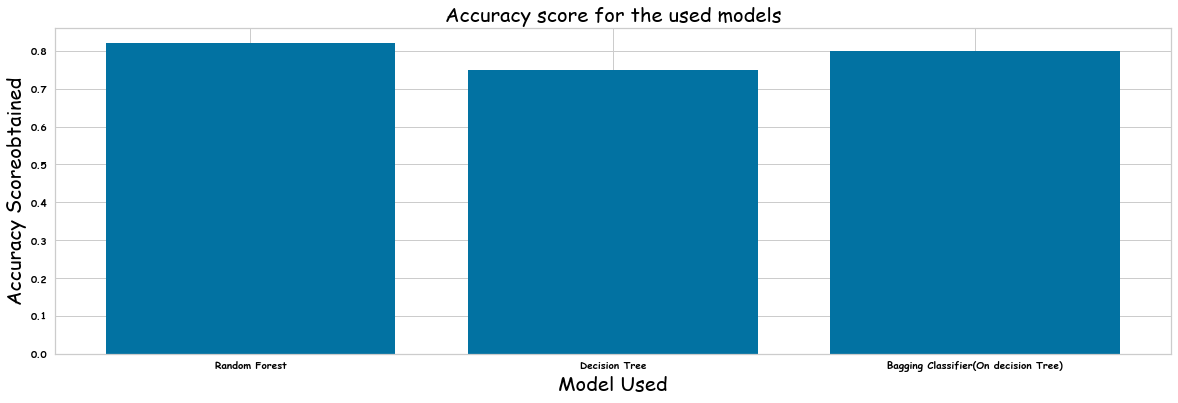

In [89]:
plt.rcParams['font.family']='cursive'
plt.rcParams['font.size']=30
plt.rc('axes',titlesize=20)
plt.rc('axes',labelsize=20)
plt.rcParams['text.color']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['font.weight']='bold'

s={'Random Forest':0.82,'Decision Tree':0.75,'Bagging Classifier(On decision Tree)':0.80}
plt.figure(figsize=(20,6))
plt.bar(s.keys(),s.values())
plt.xlabel('Model Used')
plt.ylabel('Accuracy Scoreobtained')
plt.title('Accuracy score for the used models')

Text(0.5, 1.0, 'Precision score for the used models')

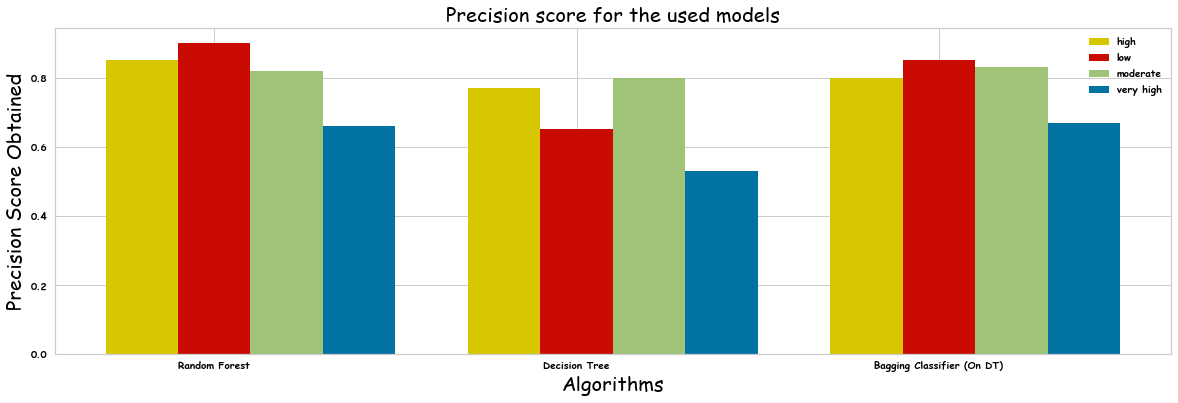

In [101]:
high=[0.85,0.77,0.80]
low=[0.90,0.65,0.85]
moderate=[0.82,0.80,0.83]
very_high=[0.66,0.53,0.67]
plt.figure(figsize=(20,6))
n=3
ind=np.arange(n)
width=0.2
bar1=plt.bar(ind,high,width,color='y')
bar2=plt.bar(ind+width,low,width,color='r')
bar3=plt.bar(ind+width*2,moderate,width,color='g')
bar4=plt.bar(ind+width*3,very_high,width,color='b')
plt.xlabel('Algorithms')
plt.ylabel('Precision Score Obtained')
plt.xticks(ind+width,['Random Forest','Decision Tree','Bagging Classifier (On DT)'])
plt.legend(('high','low','moderate','very high'))
plt.title('Precision score for the used models')

Text(0.5, 1.0, 'Recall score for the used models')

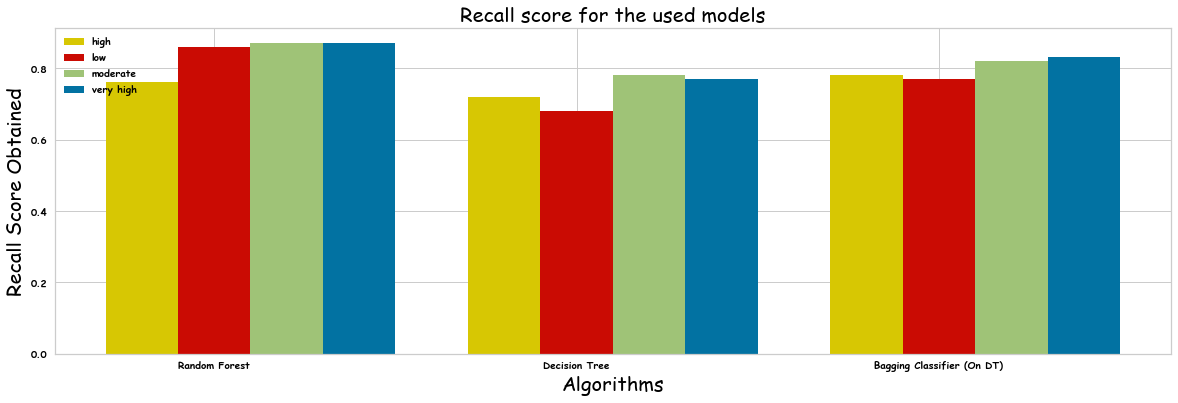

In [109]:
high=[0.76,0.72,0.78]
low=[0.86,0.68,0.77]
moderate=[0.87,0.78,0.82]
very_high=[0.87,0.77,0.83]
plt.figure(figsize=(20,6))
n=3
ind=np.arange(n)
width=0.2
bar1=plt.bar(ind,high,width,color='y')
bar2=plt.bar(ind+width,low,width,color='r')
bar3=plt.bar(ind+width*2,moderate,width,color='g')
bar4=plt.bar(ind+width*3,very_high,width,color='b')
plt.xlabel('Algorithms')
plt.ylabel('Recall Score Obtained')
plt.xticks(ind+width,['Random Forest','Decision Tree','Bagging Classifier (On DT)'])
plt.legend(('high','low','moderate','very high'),loc='upper left')
plt.title('Recall score for the used models')

Text(0.5, 1.0, 'F1 score for the used models')

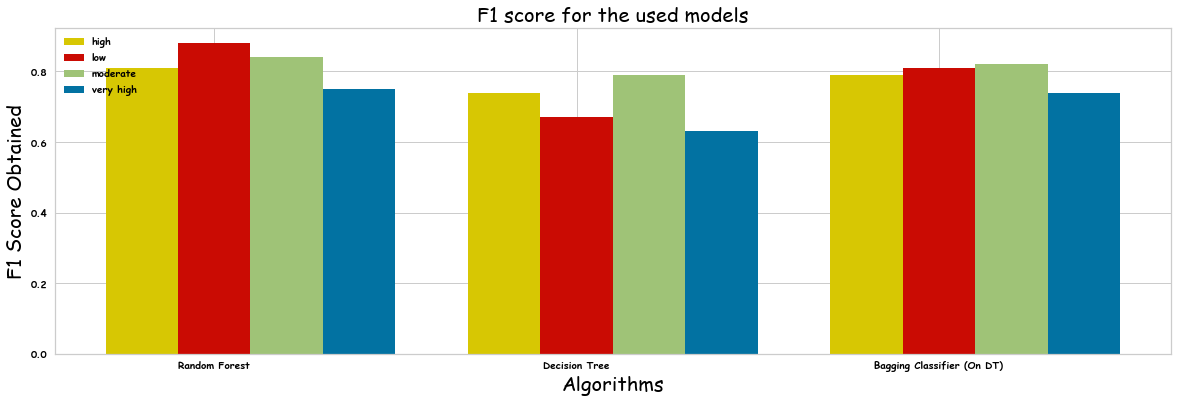

In [107]:
high=[0.81,0.74,0.79]
low=[0.88,0.67,0.81]
moderate=[0.84,0.79,0.82]
very_high=[0.75,0.63,0.74]
plt.figure(figsize=(20,6))
n=3
ind=np.arange(n)
width=0.2
bar1=plt.bar(ind,high,width,color='y')
bar2=plt.bar(ind+width,low,width,color='r')
bar3=plt.bar(ind+width*2,moderate,width,color='g')
bar4=plt.bar(ind+width*3,very_high,width,color='b')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score Obtained')
plt.xticks(ind+width,['Random Forest','Decision Tree','Bagging Classifier (On DT)'])
plt.legend(('high','low','moderate','very high'),loc='upper left')
plt.title('F1 score for the used models')

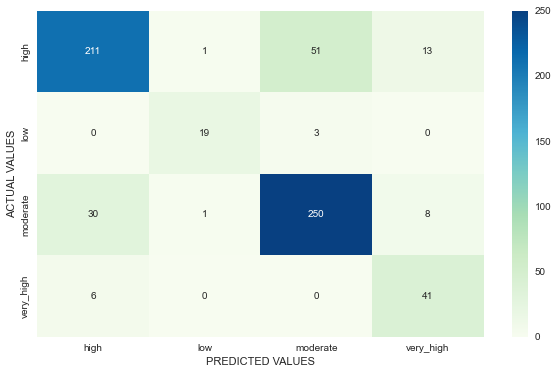

In [64]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
fx.yaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
plt.show()

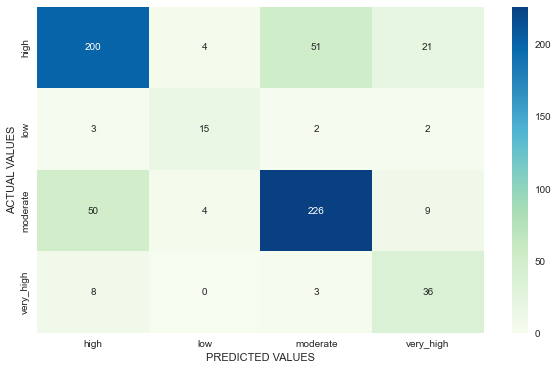

In [65]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_d),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
fx.yaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
plt.show()

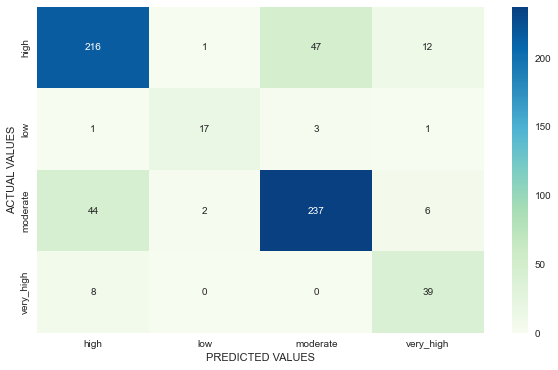

In [66]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
fx.yaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
plt.show()

In [48]:
rf_p={
   
    'n_estimators':[100,200,300,400],
    'max_depth':[x for x in range(5,20,2)]
    
    
}

grid_rf=GridSearchCV(rf_model,rf_p,cv=10,n_jobs=-1,verbose=True)
grid_rf.fit(x_train_resampled,y_train_resampled)
pred_rf=grid_rf.predict(x_test)


dt_p={
    'max_depth':[1,3,5,6,10],
    'min_samples_split':[x for x in range(1,10,2)],
    'max_features':[x for x in range(1,10)],
}
grid_dt=GridSearchCV(d_model,dt_p,cv=10,n_jobs=-1)
grid_dt.fit(x_train_resampled,y_train_resampled)
pred_dt=grid_dt.predict(x_test)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [50]:
rf=grid_rf.best_estimator_
rf.fit(x_train_resampled,y_train_resampled)
pred_rf=rf.predict(x_test)
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       276
           1       0.90      0.82      0.86        22
           2       0.82      0.89      0.85       289
           3       0.67      0.85      0.75        47

    accuracy                           0.82       634
   macro avg       0.81      0.83      0.82       634
weighted avg       0.83      0.82      0.82       634



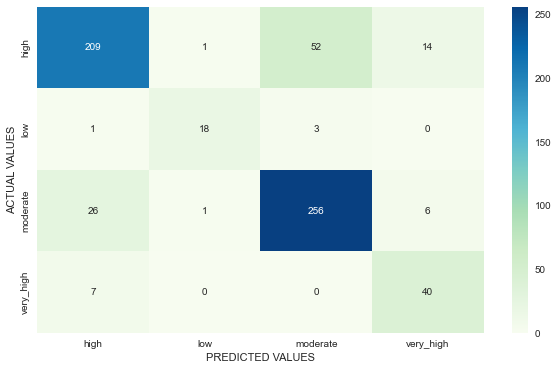

In [51]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_rf),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
fx.yaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
plt.show()

In [62]:
dt=grid_dt.best_estimator_

In [69]:
model_imp=BaggingClassifier(base_estimator=dt,n_estimators=10,random_state=20).fit(x_train_resampled,y_train_resampled)
y_pred2=model_imp.predict(x_test)

In [70]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       276
           1       0.89      0.77      0.83        22
           2       0.82      0.86      0.84       289
           3       0.62      0.83      0.71        47

    accuracy                           0.81       634
   macro avg       0.79      0.81      0.79       634
weighted avg       0.82      0.81      0.81       634



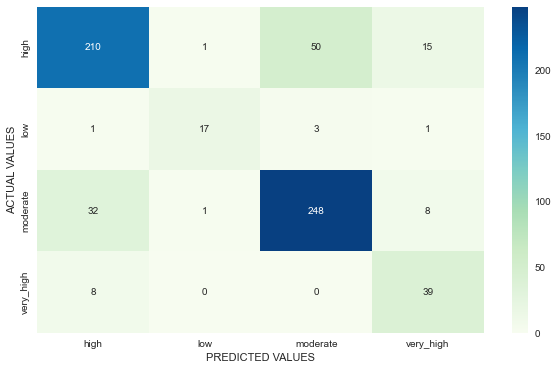

In [71]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='.0f',cmap='GnBu')
fx.set_xlabel('PREDICTED VALUES')
fx.set_ylabel('ACTUAL VALUES')
fx.xaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
fx.yaxis.set_ticklabels(['high', 'low', 'moderate', 'very_high'])
plt.show()

Text(0.5, 1.0, 'Accuracy score for the used models (After hyper parameter fine tuning)')

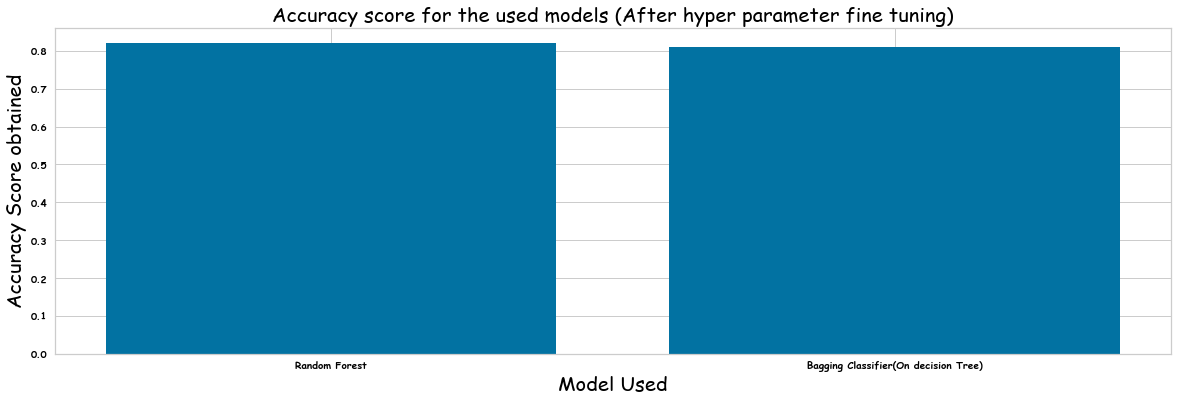

In [90]:
s={'Random Forest':0.82,'Bagging Classifier(On decision Tree)':0.81}
plt.figure(figsize=(20,6))
plt.bar(s.keys(),s.values())
plt.xlabel('Model Used')
plt.ylabel('Accuracy Score obtained')
plt.title('Accuracy score for the used models (After hyper parameter fine tuning)')

Text(0.5, 1.0, 'Precision score for the used models(After fine tuning the models)')

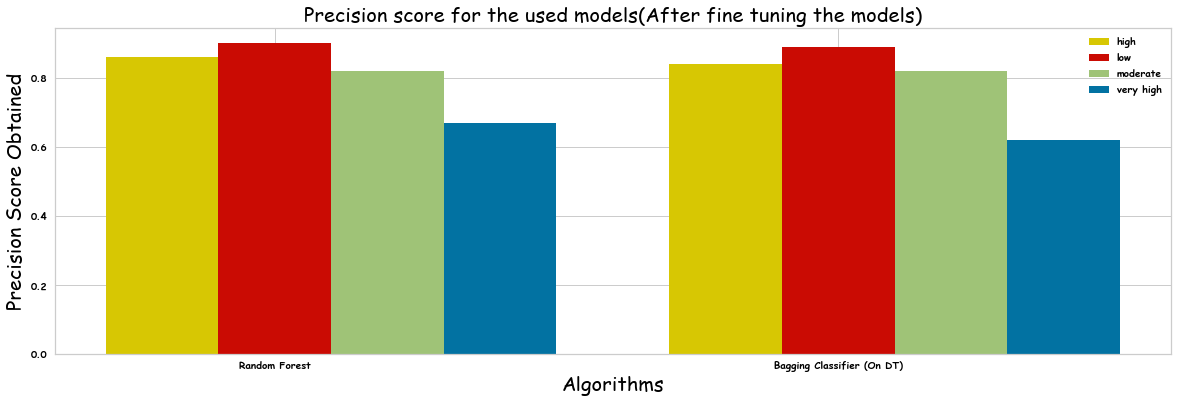

In [112]:
high=[0.86,0.84]
low=[0.90,0.89]
moderate=[0.82,0.82]
very_high=[0.67,0.62]
plt.figure(figsize=(20,6))
n=2
ind=np.arange(n)
width=0.2
bar1=plt.bar(ind,high,width,color='y')
bar2=plt.bar(ind+width,low,width,color='r')
bar3=plt.bar(ind+width*2,moderate,width,color='g')
bar4=plt.bar(ind+width*3,very_high,width,color='b')
plt.xlabel('Algorithms')
plt.ylabel('Precision Score Obtained')
plt.xticks(ind+width,['Random Forest','Bagging Classifier (On DT)'])
plt.legend(('high','low','moderate','very high'))
plt.title('Precision score for the used models(After fine tuning the models)')

Text(0.5, 1.0, 'Recall score for the used models(After fine tuning models)')

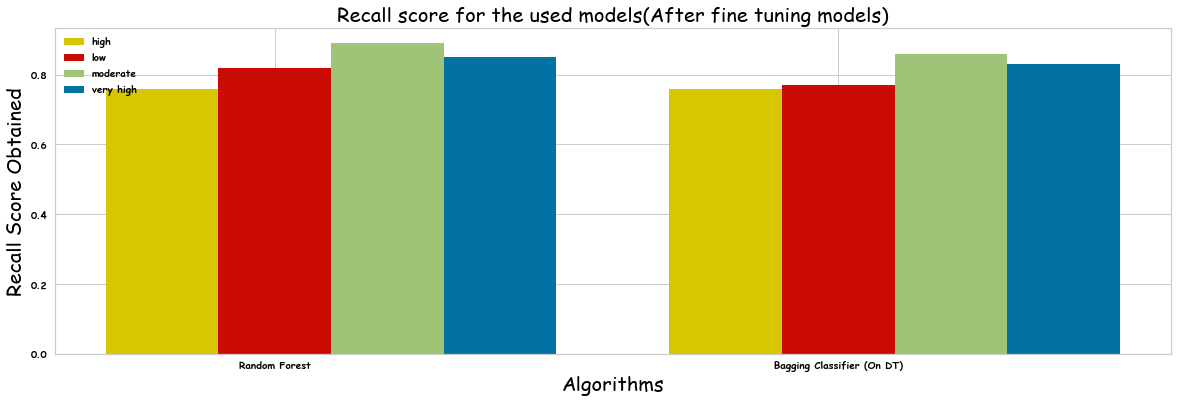

In [113]:
high=[0.76,0.76]
low=[0.82,0.77]
moderate=[0.89,0.86]
very_high=[0.85,0.83]
plt.figure(figsize=(20,6))
n=2
ind=np.arange(n)
width=0.2
bar1=plt.bar(ind,high,width,color='y')
bar2=plt.bar(ind+width,low,width,color='r')
bar3=plt.bar(ind+width*2,moderate,width,color='g')
bar4=plt.bar(ind+width*3,very_high,width,color='b')
plt.xlabel('Algorithms')
plt.ylabel('Recall Score Obtained')
plt.xticks(ind+width,['Random Forest','Bagging Classifier (On DT)'])
plt.legend(('high','low','moderate','very high'),loc='upper left')
plt.title('Recall score for the used models(After fine tuning models)')

Text(0.5, 1.0, 'F1 score for the used models(After fine tuning the models)')

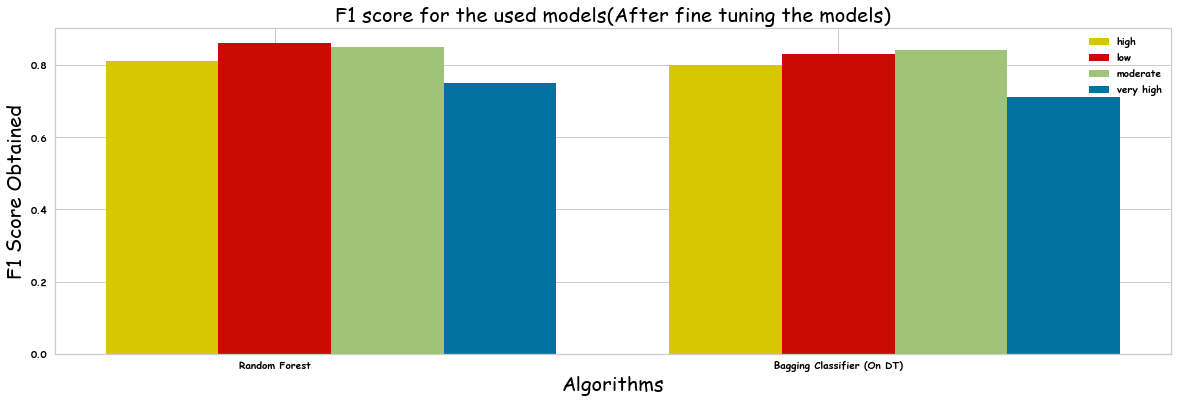

In [116]:
high=[0.81,0.80]
low=[0.86,0.83]
moderate=[0.85,0.84]
very_high=[0.75,0.71]
plt.figure(figsize=(20,6))
n=2
ind=np.arange(n)
width=0.2
bar1=plt.bar(ind,high,width,color='y')
bar2=plt.bar(ind+width,low,width,color='r')
bar3=plt.bar(ind+width*2,moderate,width,color='g')
bar4=plt.bar(ind+width*3,very_high,width,color='b')
plt.xlabel('Algorithms')
plt.ylabel('F1 Score Obtained')
plt.xticks(ind+width,['Random Forest','Bagging Classifier (On DT)'])
plt.legend(('high','low','moderate','very high'),loc='upper right')
plt.title('F1 score for the used models(After fine tuning the models)')

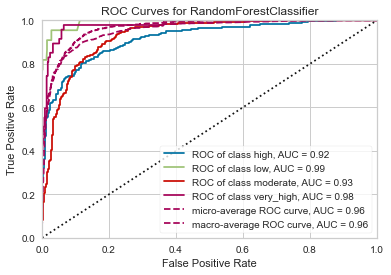

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['high', 'low', 'moderate', 'very_high'],
       estimator=RandomForestClassifier(max_depth=17, n_estimators=300))

In [59]:
roc_auc(rf, x_train_resampled, y_train_resampled, X_test=x_test, y_test=y_test, classes=['high', 'low', 'moderate', 'very_high'])

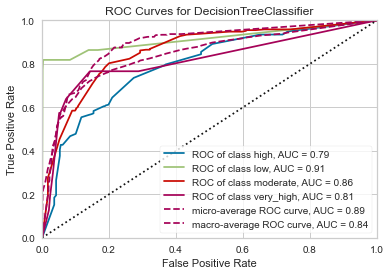

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['high', 'low', 'moderate', 'very_high'],
       estimator=DecisionTreeClassifier(max_depth=10, max_features=5,
                                        min_samples_split=5))

In [57]:
roc_auc(dt, x_train_resampled, y_train_resampled, X_test=x_test, y_test=y_test, classes=['high', 'low', 'moderate', 'very_high'])

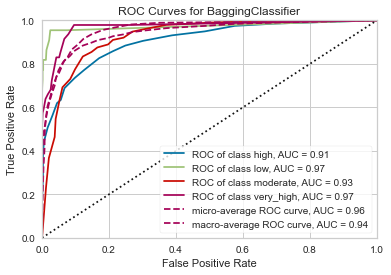

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       classes=['high', 'low', 'moderate', 'very_high'],
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   n_estimators=20, random_state=20))

In [72]:
roc_auc(model_imp, x_train_resampled, y_train_resampled, X_test=x_test, y_test=y_test, classes=['high', 'low', 'moderate', 'very_high'])